<a href="https://colab.research.google.com/github/Goonnee/Gone/blob/main/notebook89d5928ab0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import kagglehub
imdevskp_corona_virus_report_path = kagglehub.dataset_download('imdevskp/corona-virus-report')

print('Data source import complete.')

Data source import complete.


In [41]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [42]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:

#Uploading COVID-19 Data From kaggle
path = kagglehub.dataset_download("imdevskp/corona-virus-report")
df = pd.read_csv(f"{path}/covid_19_clean_complete.csv", parse_dates=['Date'])

In [44]:
df.head(10) #Viewing the first 10 column

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [45]:
df.tail(10) #Viewing the last 10 column

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49058,NaN,Malawi,-13.254300,34.301500,2020-07-27,3664,99,1645,1920,Africa
49059,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,2020-07-27,13,0,13,0,Europe
49060,Saint Pierre and Miquelon,France,46.885200,-56.315900,2020-07-27,4,0,1,3,Europe
49061,NaN,South Sudan,6.877000,31.307000,2020-07-27,2305,46,1175,1084,Africa
49062,NaN,Western Sahara,24.215500,-12.885800,2020-07-27,10,1,8,1,Africa
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [46]:
df.isnull().sum()  # checking for null values

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [47]:
df.info(), df.describe()  # checking the statistical value of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


(None,
                 Lat          Long                 Date     Confirmed  \
 count  49068.000000  49068.000000                49068  4.906800e+04   
 mean      21.433730     23.528236  2020-04-24 12:00:00  1.688490e+04   
 min      -51.796300   -135.000000  2020-01-22 00:00:00  0.000000e+00   
 25%        7.873054    -15.310100  2020-03-08 18:00:00  4.000000e+00   
 50%       23.634500     21.745300  2020-04-24 12:00:00  1.680000e+02   
 75%       41.204380     80.771797  2020-06-10 06:00:00  1.518250e+03   
 max       71.706900    178.065000  2020-07-27 00:00:00  4.290259e+06   
 std       24.950320     70.442740                  NaN  1.273002e+05   
 
               Deaths     Recovered        Active  
 count   49068.000000  4.906800e+04  4.906800e+04  
 mean      884.179160  7.915713e+03  8.085012e+03  
 min         0.000000  0.000000e+00 -1.400000e+01  
 25%         0.000000  0.000000e+00  0.000000e+00  
 50%         2.000000  2.900000e+01  2.600000e+01  
 75%        30.000000 

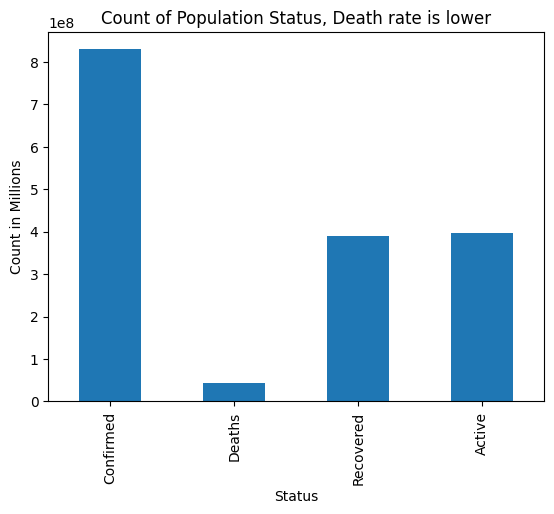

In [48]:
#Analyzing the data to check the total number of confirmed, Deaths, Recovered and Active recorded
status_count = ['Confirmed','Deaths','Recovered','Active']
column_sums = df[status_count].sum().plot(kind = 'bar', xlabel = ('Status'),ylabel = ('Count in Millions'), title = ('Count of Population Status, Death rate is lower'))

In [49]:
#From the above graph, it is observed that the number of confirmed cases are high and surpassed 1.6 millions. Death toll is stands at 0.1 millions followed by Recovered and Active cases are above 0.6 millions.

In [50]:
df.shape     # checking the shape i.e., number of columns and rows

(49068, 10)

In [51]:
#Cases in each Region
from datetime import datetime as dt

# Converting 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Now you can use the .dt accessor
df['Date'] = df['Date'].dt.normalize()
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [52]:
a = df.Date.value_counts().sort_index()
print(f"the first date is: {a.index[0]}")
print(f"the last date is: {a.index[-1]}")

the first date is: 2020-01-22
the last date is: 2020-07-27


In [53]:
total_cases = df.loc[:, ['Date', 'Confirmed']].groupby('Date').sum().reset_index()
total_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [54]:
Region = df.groupby(by = 'WHO Region').sum()
Region.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
WHO Region,,,,,,,,,
Africa,0,AlgeriaAngolaBeninBurkina FasoCabo VerdeCamero...,4727.394420,141787.234772,2020-01-222020-01-222020-01-222020-01-222020-0...,21791827,439978,11193730,10158119
Americas,AlbertaBritish ColumbiaManitobaNew BrunswickNe...,Antigua and BarbudaArgentinaBahamasBarbadosBol...,161412.174448,-670370.994644,2020-01-222020-01-222020-01-222020-01-222020-0...,402261194,19359292,157069444,225832458
Eastern Mediterranean,0,AfghanistanBahrainDjiboutiEgyptIranIraqJordanK...,108204.921108,169780.964744,2020-01-222020-01-222020-01-222020-01-222020-0...,74082892,1924029,48050703,24108160
Europe,Faroe IslandsGreenlandFrench GuianaFrench Poly...,AlbaniaAndorraArmeniaAustriaAzerbaijanBelarusB...,567986.485104,103258.565532,2020-01-222020-01-222020-01-222020-01-222020-0...,248879793,19271040,123202075,106406678
South-East Asia,0,BangladeshBhutanIndiaIndonesiaMaldivesNepalSri...,26161.732764,175703.419516,2020-01-222020-01-222020-01-222020-01-222020-0...,55118365,1458134,30030327,23629904


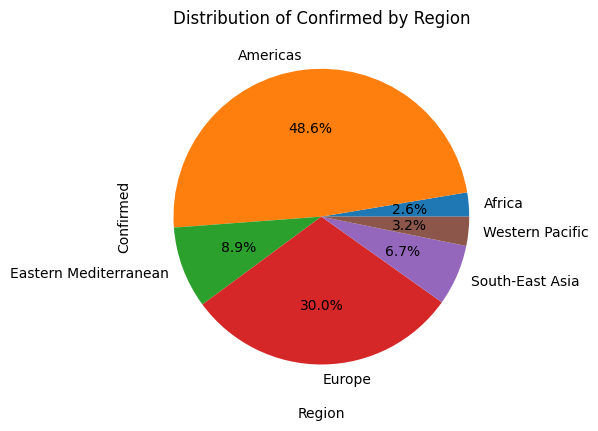

In [55]:
Region['Confirmed'].plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Distribution of Confirmed by Region')
plt.xlabel('Region')
plt.show()

In [56]:
#It is observed that the highest percentage of Confirmed cases are in Americas with 48.6% followed by Europe at 2nd postion with 30.0% and while the lowest impact seen in Africa at 2.6%

Text(0, 0.5, 'Count in Millions')

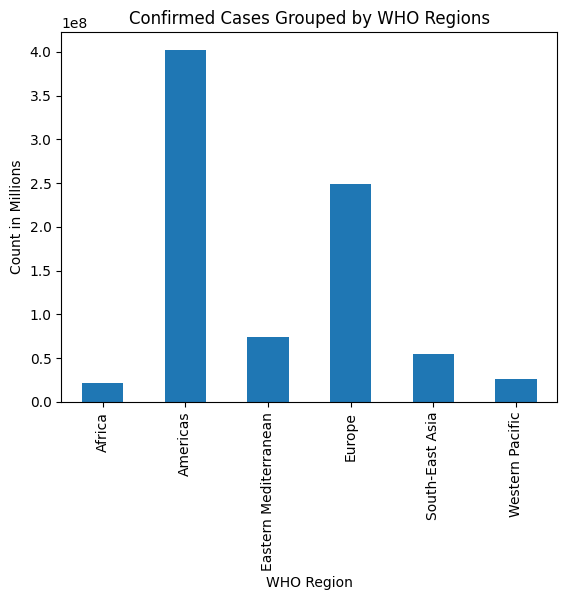

In [57]:
Region['Confirmed'].plot(kind= 'bar')
plt.title('Confirmed Cases Grouped by WHO Regions')
plt.ylabel('Count in Millions')

In [58]:
total_cases = df.loc[:, ['Date', 'Deaths']].groupby('Date').sum().reset_index()
total_cases

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


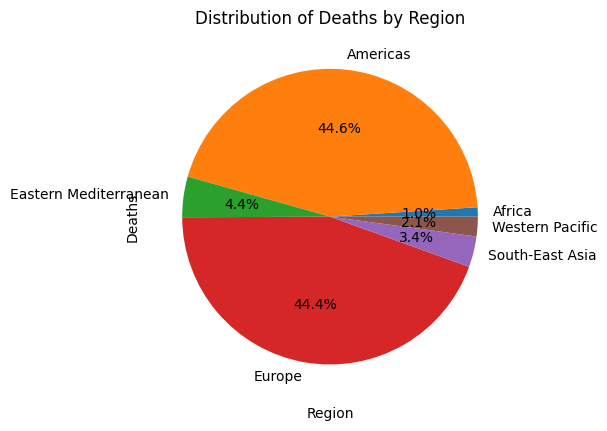

In [59]:
Region['Deaths'].plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Distribution of Deaths by Region')
plt.xlabel('Region')
plt.show()

In [60]:
#From the above pie chart it is observed that the highest percentage of deaths occured in American Region with 44.6% Slightly followed by Europe at 44.4% and the least impacted region in the deaths are Western Pacific and Africa at 2.1% and 1.0% each respectively.

Text(0, 0.5, 'Count in Millions')

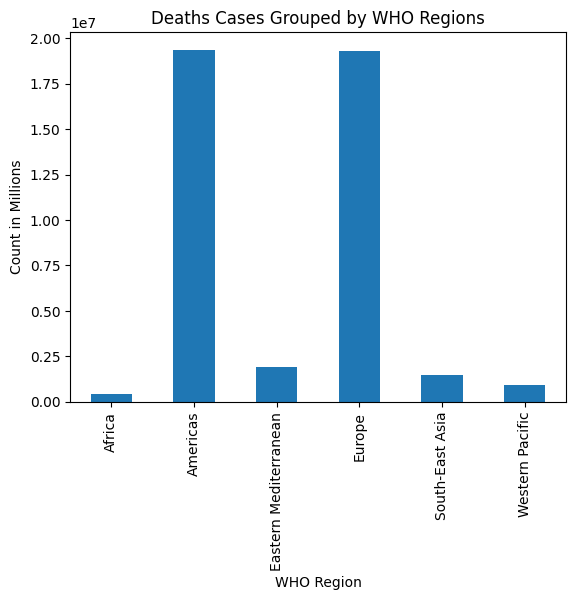

In [61]:
Region['Deaths'].plot(kind= 'bar')
plt.title('Deaths Cases Grouped by WHO Regions')
plt.ylabel('Count in Millions')

In [62]:
total_cases = df.loc[:, ['Date', 'Active']].groupby('Date').sum().reset_index()
total_cases

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


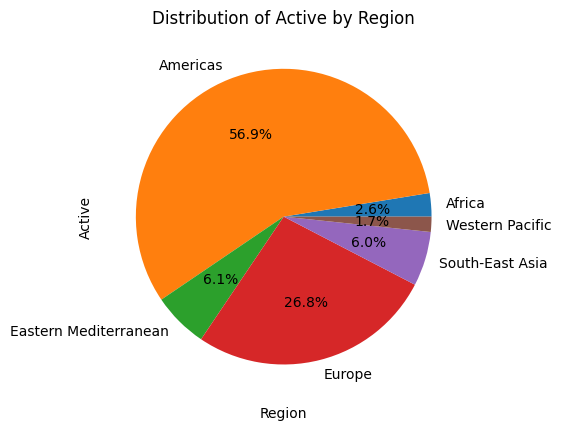

In [63]:
Region['Active'].plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Distribution of Active by Region')
plt.xlabel('Region')
plt.show()

In [64]:
#It is observed that the highest percentage of Active cases are in Americas (56.9%) followed by Europe(26.8%) at 2nd postion followed by Eastern Mediterranean (6.1%) which is slightly above South_East Asia(6.0%). The lowest impact seen in the western pacific region(1.7%)

Text(0, 0.5, 'Count in Millions')

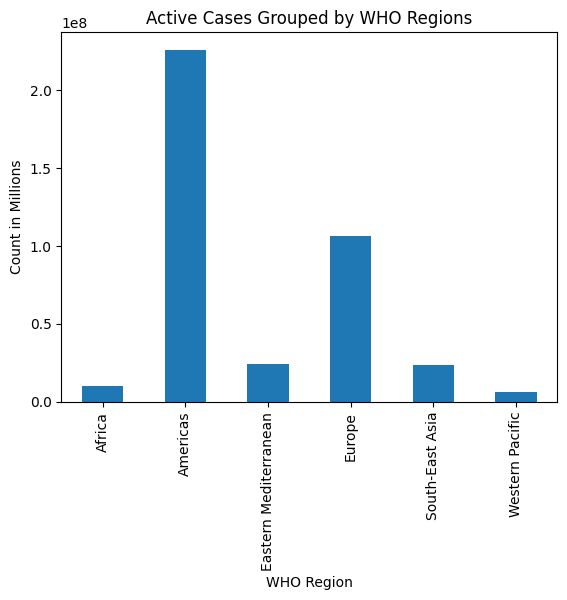

In [65]:
Region['Active'].plot(kind= 'bar')
plt.title('Active Cases Grouped by WHO Regions')
plt.ylabel('Count in Millions')

In [66]:
total_cases = df.loc[:, ['Date', 'Recovered']].groupby('Date').sum().reset_index()
total_cases

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


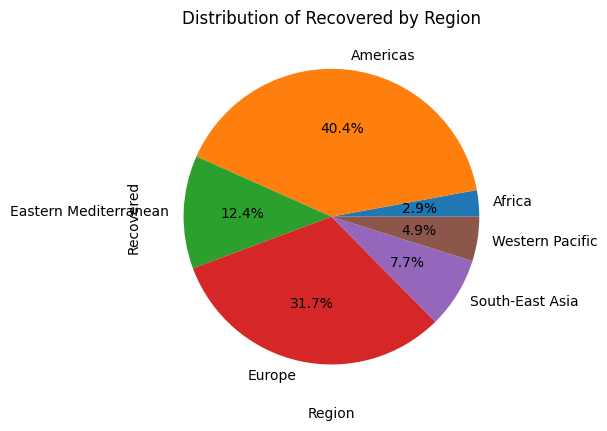

In [67]:
Region['Recovered'].plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Distribution of Recovered by Region')
plt.xlabel('Region')
plt.show()

In [68]:
#It was observed from the pie chart above that America has the highest with 40.4% followed by Europe with 31.7%. The least recovered was recorded in Africa at 2.9%.

Text(0, 0.5, 'Count in Millions')

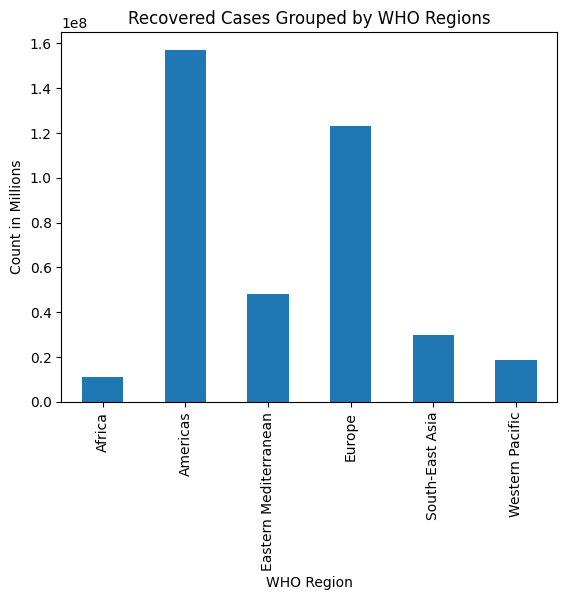

In [69]:
Region['Recovered'].plot(kind= 'bar')
plt.title('Recovered Cases Grouped by WHO Regions')
plt.ylabel('Count in Millions')

In [70]:
Region = df.groupby(by = 'WHO Region').sum()
Region.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
WHO Region,,,,,,,,,
Africa,0,AlgeriaAngolaBeninBurkina FasoCabo VerdeCamero...,4727.394420,141787.234772,2020-01-222020-01-222020-01-222020-01-222020-0...,21791827,439978,11193730,10158119
Americas,AlbertaBritish ColumbiaManitobaNew BrunswickNe...,Antigua and BarbudaArgentinaBahamasBarbadosBol...,161412.174448,-670370.994644,2020-01-222020-01-222020-01-222020-01-222020-0...,402261194,19359292,157069444,225832458
Eastern Mediterranean,0,AfghanistanBahrainDjiboutiEgyptIranIraqJordanK...,108204.921108,169780.964744,2020-01-222020-01-222020-01-222020-01-222020-0...,74082892,1924029,48050703,24108160
Europe,Faroe IslandsGreenlandFrench GuianaFrench Poly...,AlbaniaAndorraArmeniaAustriaAzerbaijanBelarusB...,567986.485104,103258.565532,2020-01-222020-01-222020-01-222020-01-222020-0...,248879793,19271040,123202075,106406678
South-East Asia,0,BangladeshBhutanIndiaIndonesiaMaldivesNepalSri...,26161.732764,175703.419516,2020-01-222020-01-222020-01-222020-01-222020-0...,55118365,1458134,30030327,23629904


Text(0, 0.5, 'Count in millions')

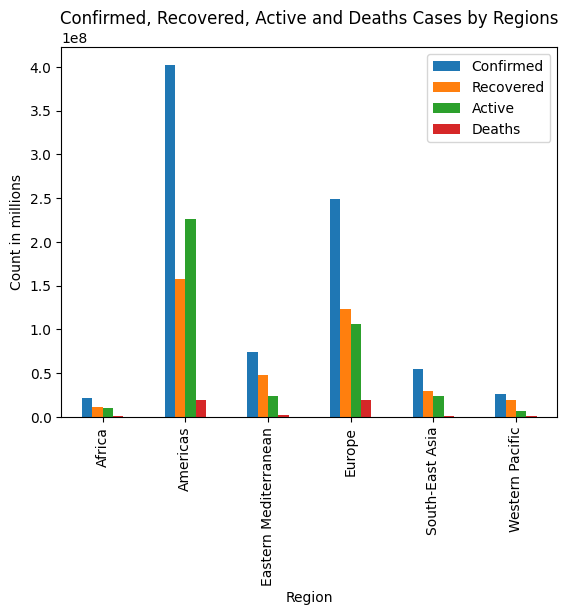

In [71]:
Region[['Confirmed', 'Recovered', 'Active','Deaths']].plot(kind = 'bar')
plt.title('Confirmed, Recovered, Active and Deaths Cases by Regions')
plt.xlabel('Region')
plt.ylabel('Count in millions')

In [72]:
#As per the above chart it is noticed that the number of confirmed, recovered, active and date cases are highest in America followed by Europe

MACHINE LEARNING

In [73]:
#Importing the necessary module
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler
# Importing train_test_split
from sklearn.model_selection import train_test_split

# since 'df' is my original DataFrame
df_clone = df.copy()  #To help Create a copy of the original DataFrame

#One hot encoding for machine learning
categorical_columns=['Province/State', 'Country/Region', 'WHO Region', 'Date'] # Include 'Date' in categorical columns
numerical_columns=[ 'Lat','Long', 'Confirmed', 'Deaths','Active', 'Recovered'] # Remove 'Date' from numerical columns
one_hot_encoder=OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore') # Now OneHotEncoder is recognized, sparse=False to get a dense array
one_hot_encoded=one_hot_encoder.fit_transform(df_clone[categorical_columns])
# one_hot_encoded_dense=one_hot_encoded.toarray() # No need to convert to dense array if sparse=False
df_one_hot_encoded=pd.DataFrame(one_hot_encoded,columns=one_hot_encoder.get_feature_names_out(categorical_columns))
df_combined=pd.concat([df_one_hot_encoded,df_clone[numerical_columns]],axis=1)

#Standardization of feature columns
#Since 'Confirmed' is the target variable, I will replace it with CONFIRM
x1=df_combined.drop(columns='Confirmed',axis=1)  # Replace 'Confirmed' with the actual target column name if needed
y=df_combined['Confirmed'] # Replace 'Confirmed' with the actual target column name if needed
# Now StandardScaler is defined because I already Imported it imported it
scaler=StandardScaler()
x=scaler.fit_transform(x1)



#Splitting data into training, validation and test data
# train_test_split is now defined because we imported it from sklearn.model_selection
x_train_val,x_test,y_train_val,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train_val,y_train_val,test_size=0.4,random_state=42)

SELECTION OF MODEL

In [74]:
#Applying first model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model1=LinearRegression()
model1.fit(x_train,y_train)
y_pred1_train=model1.predict(x_train)
r2_linear_train=r2_score(y_train,y_pred1_train)
print('r2_linear_train=', round(r2_linear_train, 3)) # Using the built-in round() function
y_pred1_val=model1.predict(x_val)
r2_linear_val=r2_score(y_val,y_pred1_val)
print('r2_linear_val=', round(r2_linear_val, 3)) # Using the built-in round() function

r2_linear_train= 1.0
r2_linear_val= 1.0


In [75]:

#Validating why both my r² are 1
from sklearn.linear_model import Ridge  # Example: using Ridge regression

# Try Ridge regression with different alpha values (regularization)
alphas = [0.1, 1, 10]
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(x_train, y_train)
    y_pred_val = ridge_model.predict(x_val)
    r2_ridge_val = r2_score(y_val, y_pred_val)
    print(f"Ridge (alpha={alpha}): R-squared (validation) = {r2_ridge_val:.3f}")

# ... (continue with other model types or feature engineering)

Ridge (alpha=0.1): R-squared (validation) = 1.000
Ridge (alpha=1): R-squared (validation) = 1.000
Ridge (alpha=10): R-squared (validation) = 1.000


In [76]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Create a Ridge regression model with regularization strength (alpha)
ridge_model = Ridge(alpha=1.0)  # Experiment with different alpha values

# Fit the model on the training data
ridge_model.fit(x_train, y_train)

# Predict on training and validation sets
y_pred_train = ridge_model.predict(x_train)
y_pred_val = ridge_model.predict(x_val)

# Calculate R-squared scores
r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)

print(f"Ridge Regression: R-squared (train) = {r2_train:.3f}")
print(f"Ridge Regression: R-squared (validation) = {r2_val:.3f}")

Ridge Regression: R-squared (train) = 1.000
Ridge Regression: R-squared (validation) = 1.000


In [77]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Applying PCA to reduce the number of features
pca = PCA(n_components=0.95)  # Keep 95% of the variance
x_train_pca = pca.fit_transform(x_train)
x_val_pca = pca.transform(x_val)

# Creating and train a Ridge regression model with PCA-transformed features
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train_pca, y_train)

# Prediction and evaluation
y_pred_train = ridge_model.predict(x_train_pca)
y_pred_val = ridge_model.predict(x_val_pca)
r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)

print(f"Ridge with PCA: R-squared (train) = {r2_train:.3f}")
print(f"Ridge with PCA: R-squared (validation) = {r2_val:.3f}")

Ridge with PCA: R-squared (train) = 0.959
Ridge with PCA: R-squared (validation) = 0.938


The fact that Deaths can be perfectly calculated from Confirmed, Recovered, and Active cases (Deaths = Confirmed - Recovered - Active) is a major source of data leakage and the primary reason why your R-squared values are so high and similar for training and validation.

Explanation

This relationship introduces a perfect linear dependency between the target variable (Deaths) and the predictor variables. Even with PCA and Ridge Regression, the model can easily exploit this dependency to achieve near-perfect predictions on both training and validation sets. It's essentially "cheating" by using a formula already embedded in the data.


Taking a different approach using Time series model and classification model

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeciljj24/n287euiw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeciljj24/pb7lgqbe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39785', 'data', 'file=/tmp/tmpeciljj24/n287euiw.json', 'init=/tmp/tmpeciljj24/pb7lgqbe.json', 'output', 'file=/tmp/tmpeciljj24/prophet_modell4qba2hr/prophet_model-20241122192342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:23:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:23:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


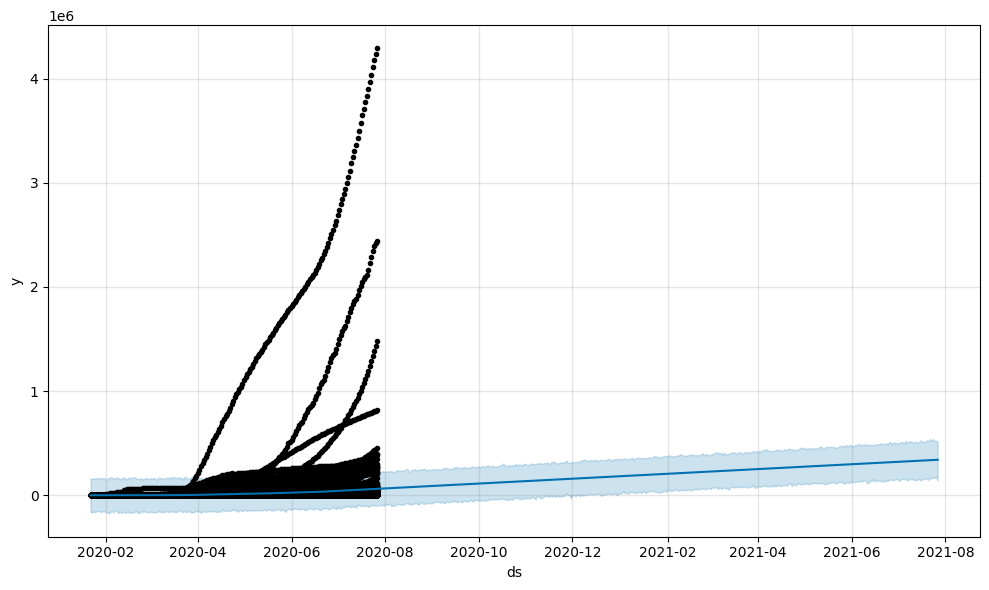

In [78]:
!pip install prophet

from prophet import Prophet

# Preparing data: Prophet expects a DataFrame with columns 'ds' (date) and 'y' (target variable)
df_prophet = df[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})

# Creating and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Make future predictions
future = model.make_future_dataframe(periods=365)  # Predict for the next year
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

 Time-Series Models

Time-series models are well-suited for data with a time component, like the COVID-19 dataset. It can capture trends, seasonality, and other temporal dependencies that traditional regression models might miss.

Potential Approaches

ARIMA (Autoregressive Integrated Moving Average): A classic time-series model that uses past values of the target variable to make predictions.
SARIMA (Seasonal ARIMA): Extends ARIMA to handle seasonal patterns in the data.
Prophet (from Facebook): A powerful library for forecasting time series data with seasonality and trend changes.
LSTM (Long Short-Term Memory) networks: A type of recurrent neural network that can capture long-term dependencies in sequential data.

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Creating categories for 'Deaths'
# Including a bin for values less than or equal to 0 and set include_lowest=True
df['DeathCategory'] = pd.cut(df['Deaths'], bins=[-float('inf'), 0, 100, 1000, float('inf')],
                              labels=['None', 'Low', 'Medium', 'High'], include_lowest=True, duplicates='drop')

# Selecting features and target variable
X = df[['Confirmed', 'Recovered', 'Active', 'Lat', 'Long']]
y = df['DeathCategory']

# Drop rows with NaN values in either X or y
df_clean = df.dropna(subset=X.columns.tolist() + [y.name])
X = df_clean[X.columns]
y = df_clean[y.name]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
# ... (evaluation metrics)

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9855308742612594
Classification Report:
               precision    recall  f1-score   support

        High       0.99      0.99      0.99      1347
         Low       0.98      0.99      0.98      8252
      Medium       0.98      0.97      0.98      1958
        None       0.99      0.98      0.99      8071

    accuracy                           0.99     19628
   macro avg       0.99      0.98      0.99     19628
weighted avg       0.99      0.99      0.99     19628

Confusion Matrix:
 [[1338    0    9    0]
 [   1 8156   24   71]
 [  15   37 1906    0]
 [   0  127    0 7944]]


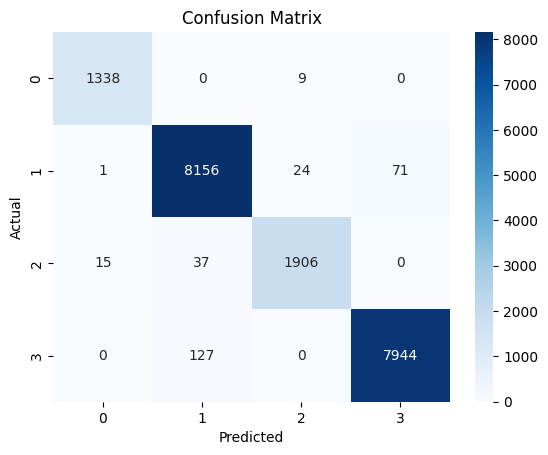

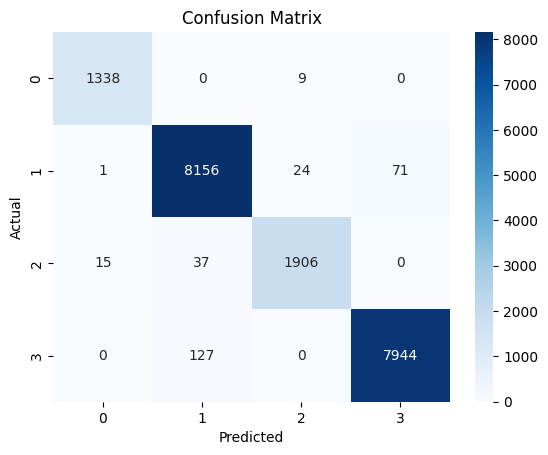

In [82]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering (example: adding a ratio feature)
df_clean['Confirmed_Recovered_Ratio'] = df_clean['Confirmed'] / df_clean['Recovered']

# Select features (including the new feature)
X = df_clean[['Confirmed', 'Recovered', 'Active', 'Lat', 'Long', 'Confirmed_Recovered_Ratio']]
y = df_clean['DeathCategory']

# ... (Data splitting and model training) ...

# Hyperparameter Tuning using GridSearchCV (example)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# ... (Evaluation and visualization) ...

# Visualize Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()